# Explore Linear Relationship Between Salary and Experience

[Datasource](https://www.kaggle.com/datasets/saquib7hussain/experience-salary-dataset/)

In [5]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [6]:
sns.set_palette('crest', 8)

In [9]:
# Load data
df = pd.read_csv("data/Experience-Salary.csv")

In [10]:
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [11]:
df.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


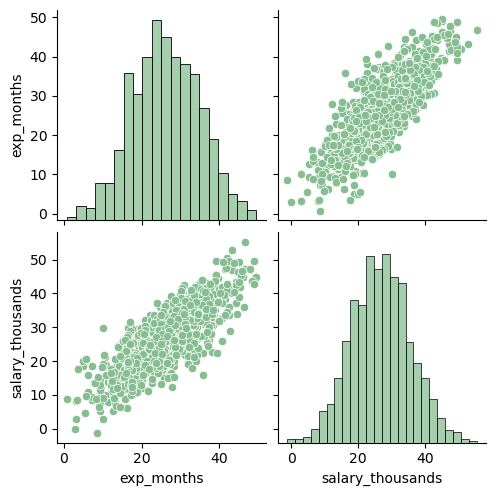

In [15]:

df.rename(columns = {'exp(in months)':'exp_months', 'salary(in thousands)': 'salary_thousands' }, inplace = True)

# explore relationships
sns.pairplot(df)

In [16]:
ols_formula = "salary_thousands ~ exp_months"

In [17]:
# Fitting the model
OLS = ols(formula = ols_formula, data=df)
model = OLS.fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       salary_thousands   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1917.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.51e-234
Time:                        23:13:38   Log-Likelihood:                -3062.3
No. Observations:                1000   AIC:                             6129.
Df Residuals:                     998   BIC:                             6138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1987      0.518     10.034      0.000       4.182       6.215
exp_months     0.8228      0.019     43.787      0.000       0.786       0.860
==============================================================================
Omnibus:                        3.580   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.592
Skew:                          -0.146   Prob(JB):                        0.166
Kurtosis:                       2.972   Cond. No.                         87.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='exp_months', ylabel='salary_thousands'>

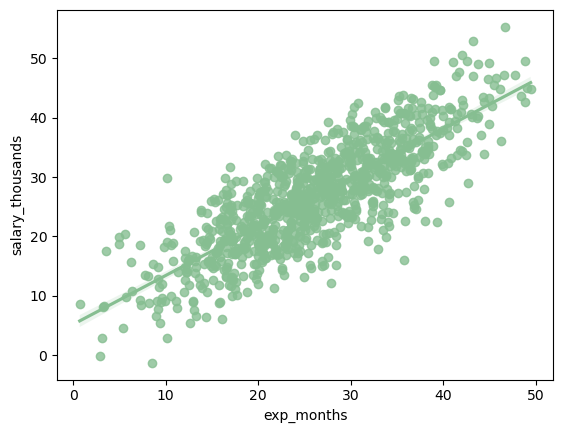

In [19]:
sns.regplot(x="exp_months", y="salary_thousands", data= df)

In [25]:
X = df["exp_months"]
fitted_values = model.predict(X)
df["salary-prediction"] = fitted_values

In [26]:
df.head(10)

,exp_months,salary_thousands,salary-prediction
0,18.290293,16.521825,20.248825
1,17.023407,11.666234,19.206372
2,26.343613,23.167255,26.875473
3,19.105834,20.877145,20.919890
4,27.742516,23.166236,28.026556
5,31.671171,32.966251,31.259236
6,14.186399,15.294170,16.871949
7,29.932845,33.159461,29.828860
8,32.841327,32.032653,32.222095
9,26.873869,32.347784,27.311792


In [27]:
residuals = model.resid

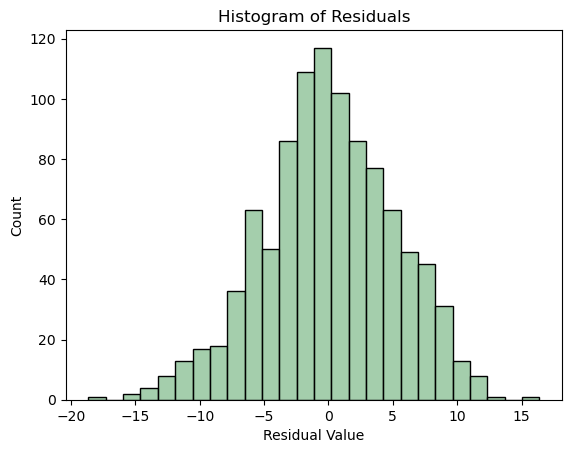

In [28]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

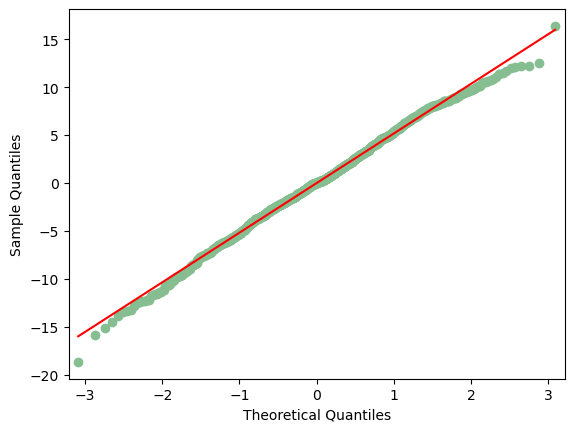

In [29]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(residuals, line = 's')
plt.show()

In [33]:

## Predicting one values
model.predict({"exp_months": 60})[0]

54.56951826716335